# Introduction to Data Science

1. Exploratory Data Analysis
2. Preprocessing
3. Feature Engineering
4. Modeling
    1. Logistic Regression
    2. Decision Tree
5. Validation
6. Add more data

### Exploratory Data Analysis (EDA)

**Purpose**: Check data quality and find interesting traces about the data and the problem you would like to solve.

**How to do it**: Generating descriptive statistics and checking the data distribution.


In [3]:
### Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Boring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
### Import the data
train = pd.read_csv("../data/train.csv", index_col=0)
test = pd.read_csv("../data/test.csv", index_col = 0)

### Basic information about the data
print("We are working with {} data points and {} columns".format(train.shape[0], train.shape[1]))

We are working with 1212039 data points and 15 columns


In [5]:
print("The columns are: {}".format(train.columns.values))

The columns are: ['genre_id' 'ts_listen' 'media_id' 'album_id' 'context_type' 'release_date'
 'platform_name' 'platform_family' 'media_duration' 'listen_type'
 'user_gender' 'user_id' 'artist_id' 'user_age' 'is_listened']


Checking the data's face:

In [6]:
train.head(20)

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
5,7,1478382544,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
6,7,1478338409,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
8,7,1479130924,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
11,7,1479279494,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
12,7,1478356603,542341,71718,1,20080215,0,0,188,1,0,822,2939,21,1
13,7,1479968326,542335,71718,1,20080215,0,0,150,1,0,2946,2939,20,0
18,7,1480084581,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
20,7,1480236062,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
22,7,1479409743,542335,71718,6,20080215,0,0,150,1,1,754,2939,29,1


Since users is a important thing in our dataset, we should check it:


In [7]:
print("We have {} unique users in the train dataset".format(len(train["user_id"].unique())))

We have 2458 unique users in the train dataset


We can see that we have only 2458 users in the train dataset, while it's known that in the test we should produce predictions to 2500 users. It means that for 42 users we need to predict something without data from them.

Now, we can do the same thing for all categorical variables:

In [6]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

print("Number of unique values for categorical columns: ")
for col in categorical_cols:
    print("{}: {}".format(col, len(train[col].unique())))


Number of unique values for categorical columns: 
genre_id: 1648
media_id: 135611
album_id: 54844
context_type: 65
release_date: 6723
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 2458
artist_id: 25226
user_age: 13


One way to get a feeling about a feature/variable in the dataset is to describe it with descriptive statistics and plot its distribution. Let's do it for age:

In [8]:
train["user_age"].describe()

count    1.212039e+06
mean     2.470945e+01
std      3.637900e+00
min      1.800000e+01
25%      2.200000e+01
50%      2.500000e+01
75%      2.800000e+01
max      3.000000e+01
Name: user_age, dtype: float64

The min is 18 and the maximum is 30. Probably, the dataset was built with this age range. It's unlikely that the oldest Deezer user is 30 years old.

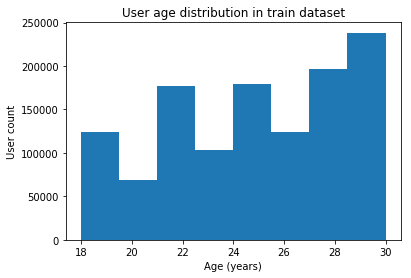

In [8]:
plt.hist(train["user_age"], bins=8)
plt.title("User age distribution in train dataset")
plt.xlabel("Age (years)")
plt.ylabel("User count")
plt.show()

We can as well check a categorical variable, as user_gender:

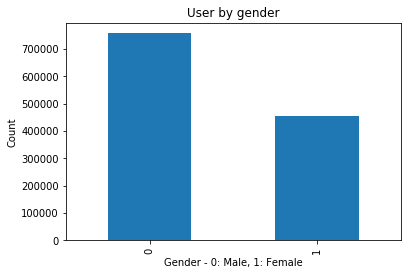

In [9]:
train["user_gender"].value_counts().plot(kind="bar")
plt.title("User by gender")
plt.xlabel("Gender - 0: Male, 1: Female")
plt.ylabel("Count")
plt.show()

Keep checking statistics and distribution for other variables!

### Preprocessing

Sometimes we need to process the data before using it as the input of a model. 

We are going to keep only a few columns to work with.

**Purpose**: Adjust data to be used.

**How to do it**: Cleaning, replacing missing values and transforming data.

In [10]:
target = "is_listened"
linear_regression_columns = ["media_duration",
                             "platform_name",
                             "platform_family",
                             "listen_type",
                             "user_gender", 
                             "user_age"]

In [11]:
train = train[linear_regression_columns + [target]]
test = test[linear_regression_columns]

In [12]:
train.head()

,media_duration,platform_name,platform_family,listen_type,user_gender,user_age,is_listened
4,150,0,0,0,1,24,1
5,150,0,0,0,1,24,1
6,150,0,0,0,1,24,1
8,150,0,0,0,1,24,1
11,150,0,0,0,1,24,1


### Feature Engineering

**Purpose**: Make data meaning more explicit to the model; Create new information by combining features;

**How to do it**: Combine, transform, encode and so on. Here's one of the most creative parts of data science, have fun!

In [13]:
train["user_age_squared"] = train["user_age"] ** 2
test["user_age_squared"] = test["user_age"] ** 2

train["media_duration_squared"] = train["media_duration"] ** 2
test["media_duration_squared"] = test["media_duration"] ** 2

In [15]:
from sklearn.preprocessing import MinMaxScaler

cols_to_rescale = ["user_age", 
                  "user_age_squared",
                  "media_duration",
                  "media_duration_squared"]

for col in cols_to_rescale:
    mm = MinMaxScaler()
    train[col + "_rescaled"] = mm.fit_transform(train[[col]])
    test[col + "_rescaled"] = mm.transform(test[[col]])

In [16]:
train.head()

,media_duration,platform_name,platform_family,listen_type,user_gender,user_age,is_listened,user_age_squared,media_duration_squared,user_age_rescaled,user_age_squared_rescaled,media_duration_rescaled,media_duration_squared_rescaled
4,150,0,0,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268
5,150,0,0,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268
6,150,0,0,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268
8,150,0,0,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268
11,150,0,0,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268


One Hot Encoding

In [17]:
from greenpyce.feature_engineering import onehot

cols_to_ohe = ["platform_name", 
               "platform_family"]

train = onehot(train, cols_to_ohe, new_columns=True)
test = onehot(test, cols_to_ohe, new_columns=True)

In [18]:
train.head()

,media_duration,listen_type,user_gender,user_age,is_listened,user_age_squared,media_duration_squared,user_age_rescaled,user_age_squared_rescaled,media_duration_rescaled,media_duration_squared_rescaled,platform_name_1,platform_name_2,platform_family_1,platform_family_2
4,150,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268,0,0,0,0
5,150,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268,0,0,0,0
6,150,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268,0,0,0,0
8,150,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268,0,0,0,0
11,150,0,1,24,1,576,22500,0.5,0.4375,0.016379,0.000268,0,0,0,0


### Modeling
#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

features = [col for col in train.columns if col != target]
features = train.columns[7:]

print(features)

Index(['user_age_rescaled', 'user_age_squared_rescaled',
       'media_duration_rescaled', 'media_duration_squared_rescaled',
       'platform_name_1', 'platform_name_2', 'platform_family_1',
       'platform_family_2'],
      dtype='object')


In [20]:
model = LogisticRegressionCV(cv=10)
model.fit(train[features], train[target])

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [21]:
model.predict_proba(test[features])

array([[ 0.23715252,  0.76284748],
       [ 0.13109075,  0.86890925],
       [ 0.2919649 ,  0.7080351 ],
       ..., 
       [ 0.3839235 ,  0.6160765 ],
       [ 0.44525309,  0.55474691],
       [ 0.32602669,  0.67397331]])

### Validation

The problem is that we don't know how our model is going to perform. We need to be able to estimate it before it goes to the wild world.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [23]:
model = LogisticRegressionCV(cv=3)
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [24]:
y_pred = model.predict_proba(X_test)[:, 1]

In [25]:
y_pred

array([ 0.62784315,  0.84790907,  0.60111601, ...,  0.60111549,
        0.71372715,  0.58392849])

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.64168467087390768

In [27]:
predictions = model.predict_proba(test[features])[:, 1]

In [28]:
submission = pd.read_csv("../data/sample_submission.csv")
submission["is_listened"] = predictions
submission.to_csv("../predictions/logistic_reg.csv", index=False)

In [28]:
train.columns

Index(['media_duration', 'listen_type', 'user_gender', 'user_age',
       'is_listened', 'user_age_squared', 'media_duration_squared',
       'user_age_rescaled', 'user_age_squared_rescaled',
       'media_duration_rescaled', 'media_duration_squared_rescaled',
       'platform_name_1', 'platform_name_2', 'platform_family_1',
       'platform_family_2'],
      dtype='object')

### Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [29]:
from sklearn.tree import DecisionTreeClassifier

features = train.columns[:-4]
features = [col for col in train.columns if col != target]
features = [feat for feat in features if feat != target]
print(features)

['media_duration', 'listen_type', 'user_gender', 'user_age', 'user_age_squared', 'media_duration_squared', 'user_age_rescaled', 'user_age_squared_rescaled', 'media_duration_rescaled', 'media_duration_squared_rescaled', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.69077025937065484

In [32]:
predictions = model.predict_proba(test[features])[:, 1]

In [33]:
submission = pd.read_csv("../data/sample_submission.csv")
submission["is_listened"] = predictions
submission.to_csv("../predictions/decision_tree.csv", index=False)

### More data

In [34]:
train = pd.read_csv("../data/train.csv", index_col=0)
test = pd.read_csv("../data/test.csv", index_col = 0)
artists = pd.read_csv("../data/deezer_API_artist_features.csv", sep=";")

In [42]:
artists.head()

,artist_albuns,artist_fans,artist_id,artist_radio
0,1.0,32.0,55164,False
1,18.0,6204.0,55830,True
2,23.0,20022.0,2704,True
3,56.0,442765.0,938,True
4,65.0,28423.0,2939,True


In [44]:
train = pd.merge(train, artists, how="outer", on="artist_id")
train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened,artist_albuns,artist_fans,artist_radio
0,7.0,1.478369e+09,542335.0,71718.0,0.0,20080215.0,0.0,0.0,150.0,0.0,1.0,1812.0,2939,24.0,1.0,65.0,28423.0,True
1,7.0,1.478383e+09,542335.0,71718.0,0.0,20080215.0,0.0,0.0,150.0,0.0,1.0,1812.0,2939,24.0,1.0,65.0,28423.0,True
2,7.0,1.478338e+09,542335.0,71718.0,0.0,20080215.0,0.0,0.0,150.0,0.0,1.0,1812.0,2939,24.0,1.0,65.0,28423.0,True
3,7.0,1.479131e+09,542335.0,71718.0,0.0,20080215.0,0.0,0.0,150.0,0.0,1.0,1812.0,2939,24.0,1.0,65.0,28423.0,True
4,7.0,1.479279e+09,542335.0,71718.0,0.0,20080215.0,0.0,0.0,150.0,0.0,1.0,1812.0,2939,24.0,1.0,65.0,28423.0,True
